In [1]:
# Neural Spiking Data Analysis Notebook
# AI-generated using dandi-notebook-gen
# Note: This notebook has not been fully verified - use caution when interpreting results

# Exploring DANDI:001363 - Rat Somatosensory Cortex Data

This notebook provides an introduction to analyzing the neural spiking data from rat somatosensory cortex in response to transcranial focused ultrasound stimulation.

**Dataset information:**
- **Title:** Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound
- **Description:** Investigation of neuronal response to tFUS using a flexible electrode array, testing various ultrasound pressures and parameters.
- **Subjects:** HSD:WI rats
- **Recording details:** 32-channel electrode array, 24.4kHz sampling rate
- **Dandiset ID:** 001363

Dataset contains 505 trials testing ultrasound parameters including pressure levels (100-1300 kPa), duty cycles (0.6%-90%), and pulse repetition frequencies (30-4500 Hz).

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in Dandiset 001363")

Found 55 assets in Dandiset 001363


## Loading and Exploring Data

We'll examine one NWB file from the dataset to demonstrate analysis approaches. 

In [3]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the NWB file
nwb_url = "https://lindi.neurosift.org/dandi/dandisets/001363/assets/5fe5283e-d987-4fad-bf65-ca1045b5bb51/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

print(f"Session ID: {nwb.identifier}")
print(f"Recording start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session ID: BH625_4500_67_50V
Recording start time: 2024-12-06 18:57:16-05:00
Subject ID: BH625


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Trial Information

The dataset contains marked periods of ultrasound stimulation.

Number of trials: 484
Average trial duration: 1.500s


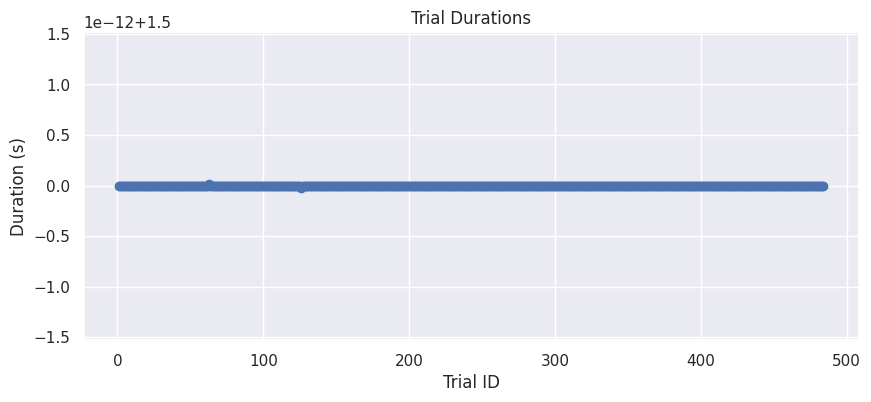

In [4]:
trials = nwb.intervals["trials"]
start_times = trials["start_time"][:]
stop_times = trials["stop_time"][:]
durations = stop_times - start_times

print(f"Number of trials: {len(trials)}")
print(f"Average trial duration: {np.mean(durations):.3f}s")

plt.figure(figsize=(10, 4))
plt.plot(trials["id"][:], durations, 'o')
plt.xlabel('Trial ID')
plt.ylabel('Duration (s)')
plt.title('Trial Durations')
plt.show()

### Electrical Recordings

The neural data is stored in an ElectricalSeries object with 32 channels.

Recording rate: 24414.0625 Hz
Number of electrodes: 32
First 5 electrode IDs: [0 1 2 3 4]


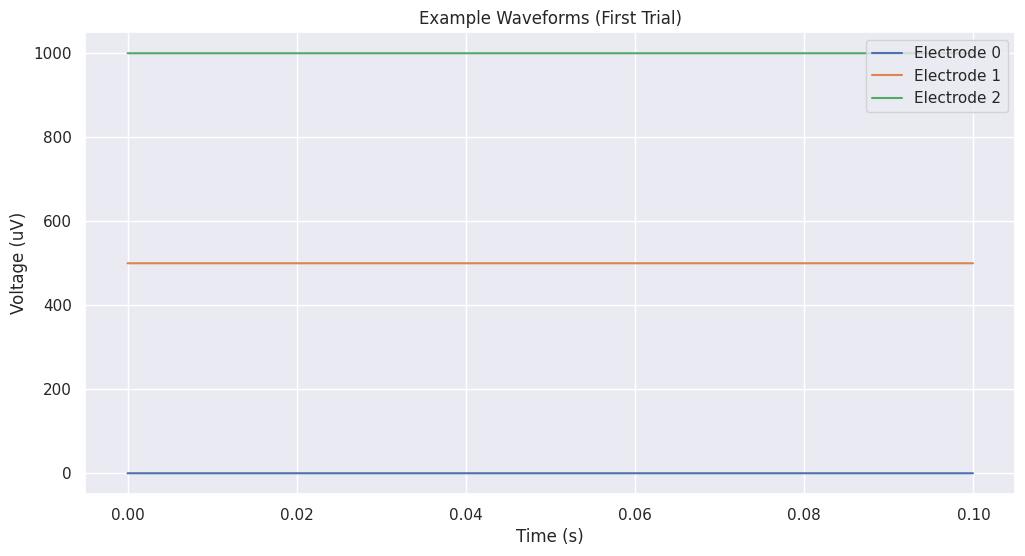

In [5]:
electrical_series = nwb.acquisition["ElectricalSeries"]
sample_rate = electrical_series.rate
electrode_ids = electrical_series.electrodes["id"][:]

print(f"Recording rate: {sample_rate} Hz")
print(f"Number of electrodes: {len(electrode_ids)}")
print(f"First 5 electrode IDs: {electrode_ids[:5]}")

# Plot example waveforms
start_sample = int(start_times[0] * sample_rate)
end_sample = int(start_sample + 0.1 * sample_rate)  # 100ms window

plt.figure(figsize=(12, 6))
for i in range(3):
    data = electrical_series.data[start_sample:end_sample, i]
    time = np.arange(len(data)) / sample_rate
    plt.plot(time, data + i*500, label=f'Electrode {electrode_ids[i]}')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('Example Waveforms (First Trial)')
plt.legend()
plt.show()